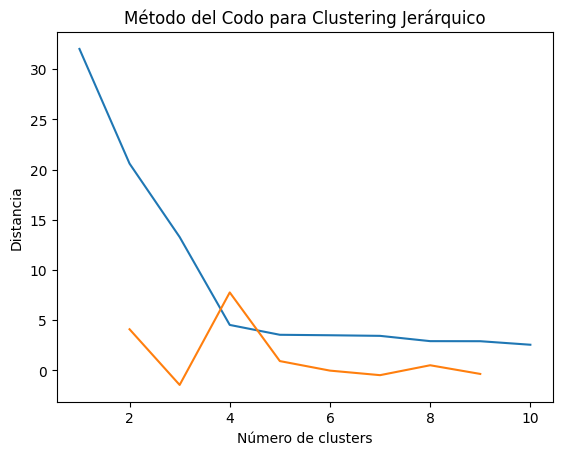

El número óptimo de clusters es: 4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.datasets import make_blobs

# Generar datos de ejemplo
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

# Calcular la matriz de distancias
dist_matrix = pdist(X)

# Aplicar el algoritmo de clustering jerárquico
Z = linkage(dist_matrix, 'ward')

# Método del Codo
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

# Aumentos en las distancias
acceleration = np.diff(last, 2)  # Segunda derivada de las distancias
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.xlabel('Número de clusters')
plt.ylabel('Distancia')
plt.title('Método del Codo para Clustering Jerárquico')
plt.show()

k = acceleration_rev.argmax() + 2  # Encontrar el punto del codo
print(f"El número óptimo de clusters es: {k}")


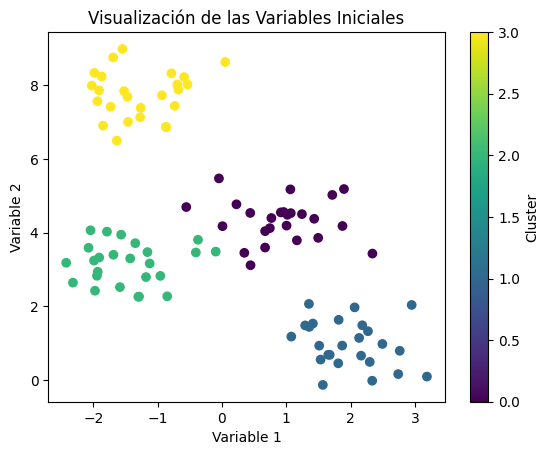

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generar datos de ejemplo
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

# Graficar los datos
plt.scatter(X[:, 0], X[:, 1], c= y, cmap='viridis')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Visualización de las Variables Iniciales')
plt.colorbar(label='Cluster')
plt.show()


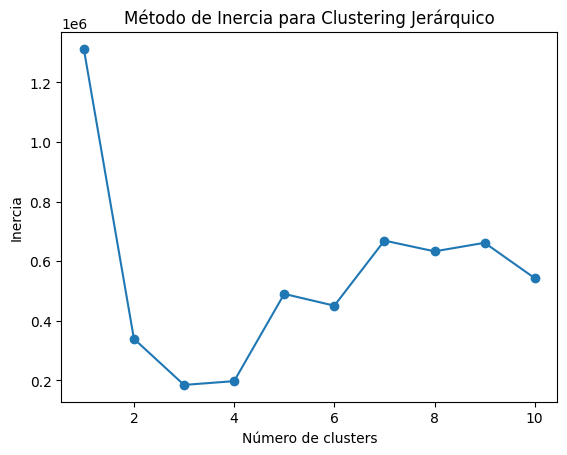

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin_min

# Función para calcular la inercia
def calculate_inertia(X, labels):
    centroids, _ = pairwise_distances_argmin_min(np.array([X[labels == i].mean(axis=0) for i in np.unique(labels)]), X)
    inertia = sum((X[i] - centroids[labels[i]]) ** 2 for i in range(X.shape[0]))
    return inertia.sum()

# Calcular la inercia para diferentes números de clusters
inertias = []
for n_clusters in range(1, 11):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = model.fit_predict(X)
    inertia = calculate_inertia(X, labels)
    inertias.append(inertia)

# Graficar el método de inercia
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método de Inercia para Clustering Jerárquico')
plt.show()


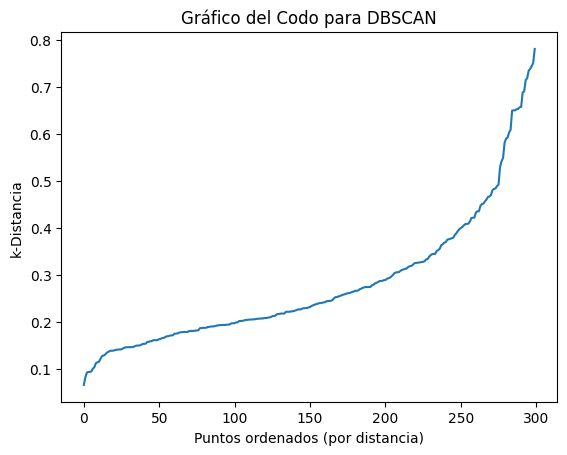

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)

# Calcular k-vecinos más cercanos
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Ordenar las distancias
distances = np.sort(distances[:, 4], axis=0)

# Graficar el gráfico del codo para encontrar el valor óptimo de epsilon
plt.plot(distances)
plt.ylabel('k-Distancia')
plt.xlabel('Puntos ordenados (por distancia)')
plt.title('Gráfico del Codo para DBSCAN')
plt.show()


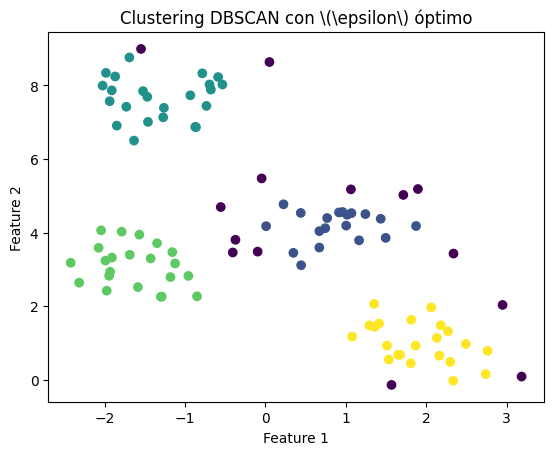

In [ ]:
from sklearn.cluster import DBSCAN

# Valor de epsilon determinado por el gráfico del codo
epsilon_optimo = 0.6 # Ajusta este valor según el punto de inflexión de tu gráfico

# Aplicar DBSCAN
dbscan = DBSCAN(eps=epsilon_optimo, min_samples=5)
labels = dbscan.fit_predict(X)

# Graficar resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering DBSCAN con \(\epsilon\) óptimo')
plt.show()
